In [1]:
# Get thinkdsp.py

import os

if not os.path.exists('thinkdsp.py'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py

import numpy as np
PI2 = np.pi * 2

import matplotlib.pyplot as plt

from thinkdsp import decorate
from thinkdsp import UncorrelatedGaussianNoise

Создадим функции

In [2]:
def analyze1(ys, fs, ts):
    args = np.outer(ts, fs)
    M = np.cos(PI2 * args)
    amps = np.linalg.solve(M, ys)
    return amps

def analyze2(ys, fs, ts):
    args = np.outer(ts, fs)
    M = np.cos(PI2 * args)
    amps = M.dot(ys) / 2
    return amps

def dct_iv(ys):
    N = len(ys)
    ts = (0.5 + np.arange(N)) / N
    fs = (0.5 + np.arange(N)) / 2
    args = np.outer(ts, fs)
    M = np.cos(PI2 * args)
    amps = np.dot(M, ys) / 2
    return amps

signal = UncorrelatedGaussianNoise()
wave = signal.make_wave(duration=1.0, framerate=16384)
wave.ys.shape

(16384,)

In [3]:
ns = 2 ** np.arange(6,12)
ns

array([  64,  128,  256,  512, 1024, 2048], dtype=int32)

In [4]:
best_analyze1 = []
for n in ns:
    ts = (0.5 + np.arange(n)) / n
    freqs = (0.5 + np.arange(n)) / 2
    ys = wave.ys[:n]
    best =  %timeit -r1 -o analyze1(ys,freqs,ts)
    best_analyze1.append(best.best)
best_analyze1

1.29 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 100 loops each)
5.56 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 100 loops each)
8.94 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 100 loops each)
35.7 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 100 loops each)
145 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 10 loops each)
196 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


[0.001289265999998861,
 0.005556555000000571,
 0.00894470199999887,
 0.03570127800000136,
 0.1451685600000019,
 0.19600400000012996]

In [5]:
best_analyze2 = []
for n in ns:
    ts = (0.5 + np.arange(n)) / n
    freqs = (0.5 + np.arange(n)) / 2
    ys = wave.ys[:n]
    best =  %timeit -r1 -o analyze2(ys,freqs,ts)
    best_analyze2.append(best.best)
best_analyze2

55.5 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 10,000 loops each)
242 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 1,000 loops each)
817 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 1,000 loops each)
3.72 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 100 loops each)
14.3 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 100 loops each)
56 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 10 loops each)


[5.5475840000008244e-05,
 0.00024243920000003528,
 0.000817301599999837,
 0.0037245179999990797,
 0.014345560000001568,
 0.05598479000000225]

In [6]:
import scipy.fftpack

best_dct = []
for n in ns:
    ys = wave.ys[:n]
    best =  %timeit -r1 -o scipy.fftpack.dct(ys, type=3)
    best_dct.append(best.best)
best_dct

5.59 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 100,000 loops each)
5.89 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 100,000 loops each)
6.4 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 100,000 loops each)
7.79 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 100,000 loops each)
10.2 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 100,000 loops each)
16.3 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 100,000 loops each)


[5.594237999998768e-06,
 5.885951000000204e-06,
 6.399171000000479e-06,
 7.792852000000039e-06,
 1.0213402000001679e-05,
 1.6327022999998917e-05]

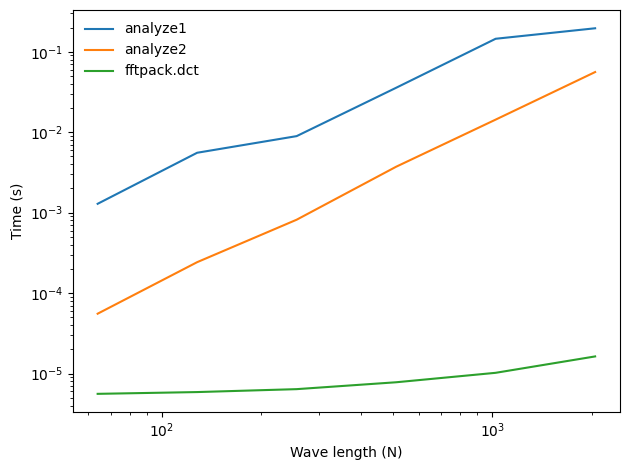

In [7]:
plt.plot(ns, best_analyze1, label='analyze1')
plt.plot(ns, best_analyze2, label='analyze2')
plt.plot(ns, best_dct, label='fftpack.dct')
loglog = dict(xscale='log', yscale='log')
decorate(xlabel='Wave length (N)', ylabel='Time (s)', **loglog)

По графикам видно, что оба результата скорее пропорциональны квадрату, а не кубу

In [8]:
from scipy.stats import linregress

linregress(np.log(ns),np.log(best_analyze1))

LinregressResult(slope=1.496000018135019, intercept=-12.72325995358384, rvalue=0.9879583304157414, pvalue=0.00021662967764393392, stderr=0.11714128052500643, intercept_stderr=0.7039601480943184)

В ячейке выше видно, что наклон для analyze1 равен 1.5, что гораздо меньше, чем 3

In [9]:
linregress(np.log(ns),np.log(best_analyze2))

LinregressResult(slope=1.9926692503934944, intercept=-18.06591658124797, rvalue=0.9997545921685509, pvalue=9.033011576104717e-08, stderr=0.022077219524317664, intercept_stderr=0.1326729796378806)

In [10]:
linregress(np.log(ns),np.log(best_dct))

LinregressResult(slope=0.2970244481592654, intercept=-13.47880412680994, rvalue=0.939202582872923, pvalue=0.0054321253593043245, stderr=0.054294655134299236, intercept_stderr=0.3262835551888307)